<a href="https://colab.research.google.com/github/mirozy13/Machine-learning/blob/main/Body_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание: 
Построить модель классификации на наборе данных Body Performance, сделать простое веб-приложение на Gradio


#Получение набора данных

Скачиваем набор данных.

In [345]:
!wget https://gist.githubusercontent.com/Yegorov/dc61c42aa4e89e139cd8248f59af6b3e/raw/20ac954e202fe6a038c2b4bb476703c02fe0df87/ya.py
!chmod +x ya.py
!./ya.py https://disk.yandex.ru/d/5mI0kbSLSBD01w path/to/directory

--2023-05-07 13:20:52--  https://gist.githubusercontent.com/Yegorov/dc61c42aa4e89e139cd8248f59af6b3e/raw/20ac954e202fe6a038c2b4bb476703c02fe0df87/ya.py
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 723 [text/plain]
Saving to: ‘ya.py.2’

ya.py.2             100%[===================>]     723  --.-KB/s    in 0s      

2023-05-07 13:20:53 (23.2 MB/s) - ‘ya.py.2’ saved [723/723]

--2023-05-07 13:20:53--  https://downloader.disk.yandex.ru/disk/b7a1f97c547f608dc60880c44154194035398c71ddda7a9bcc5fe03e89996548/6457ddf5/3v-krRA316KhQDn3zNPZX4HwlF4GN3JWIreVvZxgwp5qDAS3vC3MQK5zb8U0e3jnFqu1d7h7QYc-A-Qe92CoeA%3D%3D?uid=0&filename=bodyPerformance-dataset.csv&disposition=attachment&hash=hvFexZEHC6eeKFCtkKHvUUckNBy15/z6BX6on7TNH6yQSNKp/cz%2B/HTbJS%2BVLI/bq/J6bpmRyOJon

In [438]:
import pandas as pd
df = pd.read_csv("/content/bodyPerformance-dataset.csv", sep=';')

In [439]:
df

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      -      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0           54.9                     18.4            60.0          217.0     C  
1           36.4                     16.3            53.0          229.0     A  
2           44.8                     12.0            49.0          181.0     C  
3           41.4                     15.2            53.0          219.0     B  
4           43.5                     27.1            45.0          217.0     B  
...          ...                      ...             ...            ...   ...  
13388       35.8                     17.4            47.0          198.0     C  
13389       33.0                      1.1            48.0          167.0     D  
13390       63.5                     16.4            45.0          229.0     A  
13391       19.3                      9.2             0.0           75.0     D  
13392       35.9                      7.1            51.0          180.0     C  

[13393 rows x 12 columns]

In [440]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [441]:
df.dtypes

age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

#Описание набора данных

Набор данных - Body Performance, данные для оценки физического состояния человека.

13393 строк, 12 признаков.

1. age: возраст, лет

2. gender: пол

3. weight_kg : вес в кг

3. height_cm : высота в сантиметрах

4. body_fat: процент жира

5. diastolic: диастолическое артериальное давление

6. systolic: систолическое артериальное давление

7. gripForce: сила сжатия кулака (оценка с помощью динамометра)

8. sit and bend forward_cm: Наклон вперед из положения сидя, результат в сантиметрах (от пяток до кончиков пальцев).

9. sit-ups counts: количество подъемов корпуса из положения лежа за 2 минуты

10. broad jump_cm результат прыжка в длину

11. class: класс оценки физического состочния : A,B,C,D (A - лучший)

Источник - Корейский фонд содействия развитию спорта

#EDA

In [396]:
!pip install ydata_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [397]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 1. Анализ данных

In [442]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

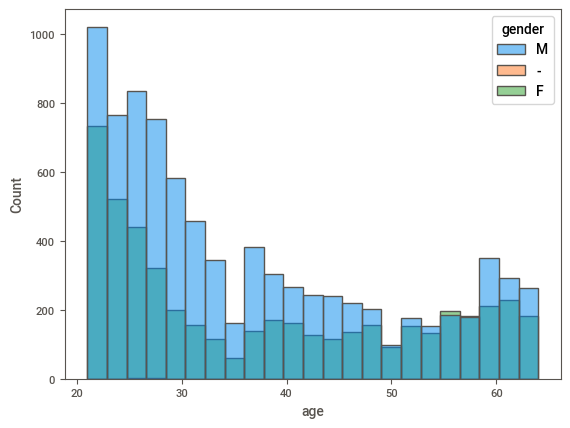

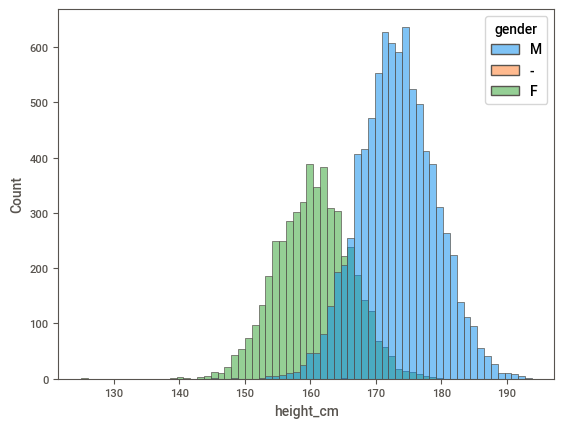

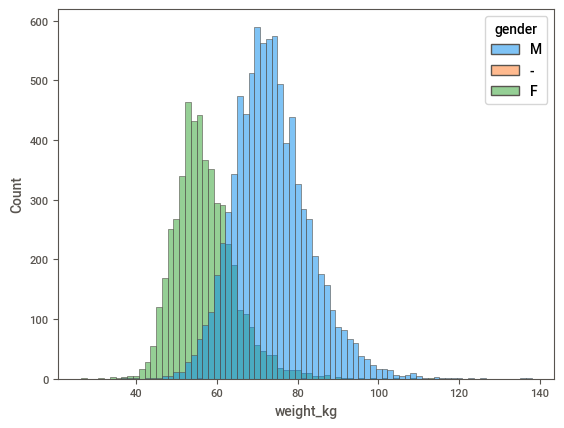

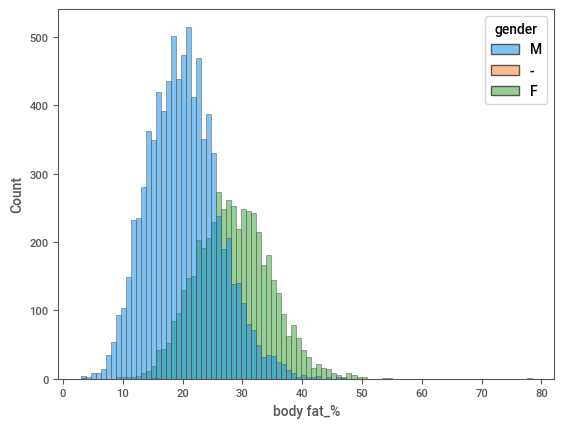

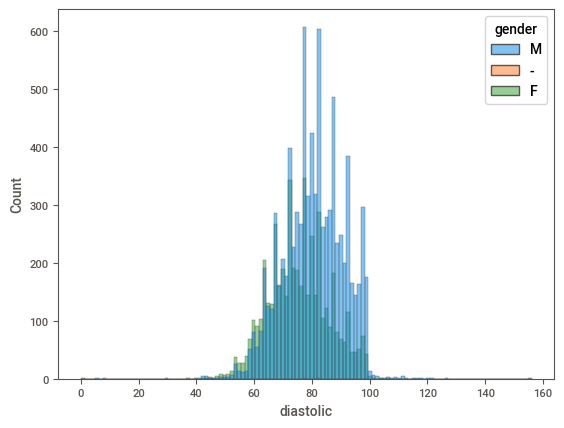

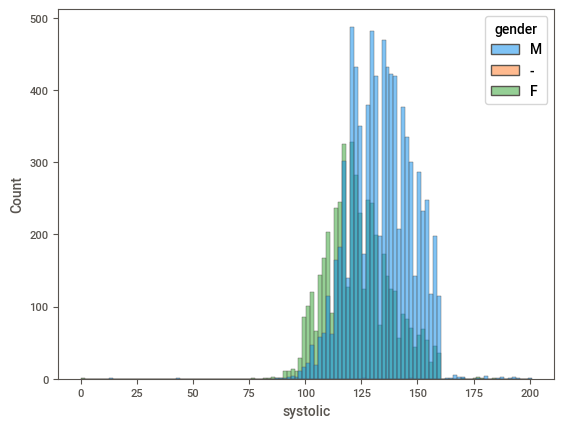

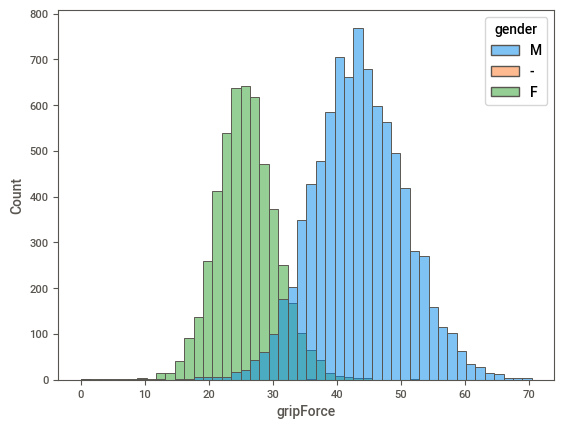

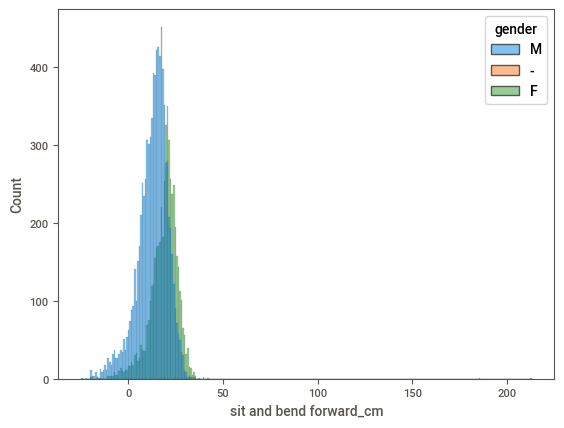

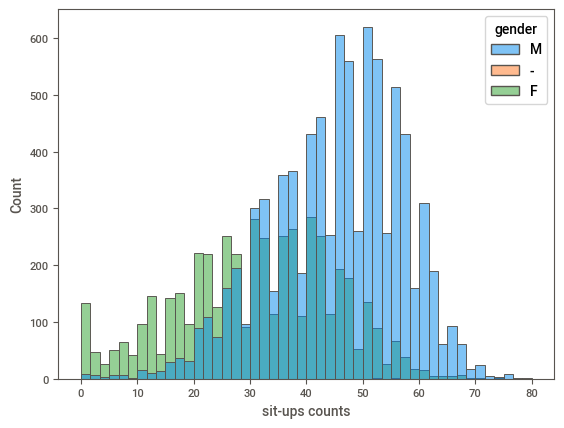

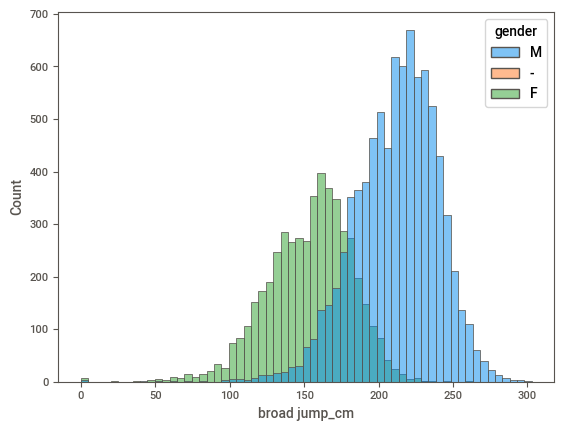

In [443]:
columns = df.describe().columns
for i in columns:
    sns.histplot(
        x = i,
        hue = "gender",
        data = df
    )
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


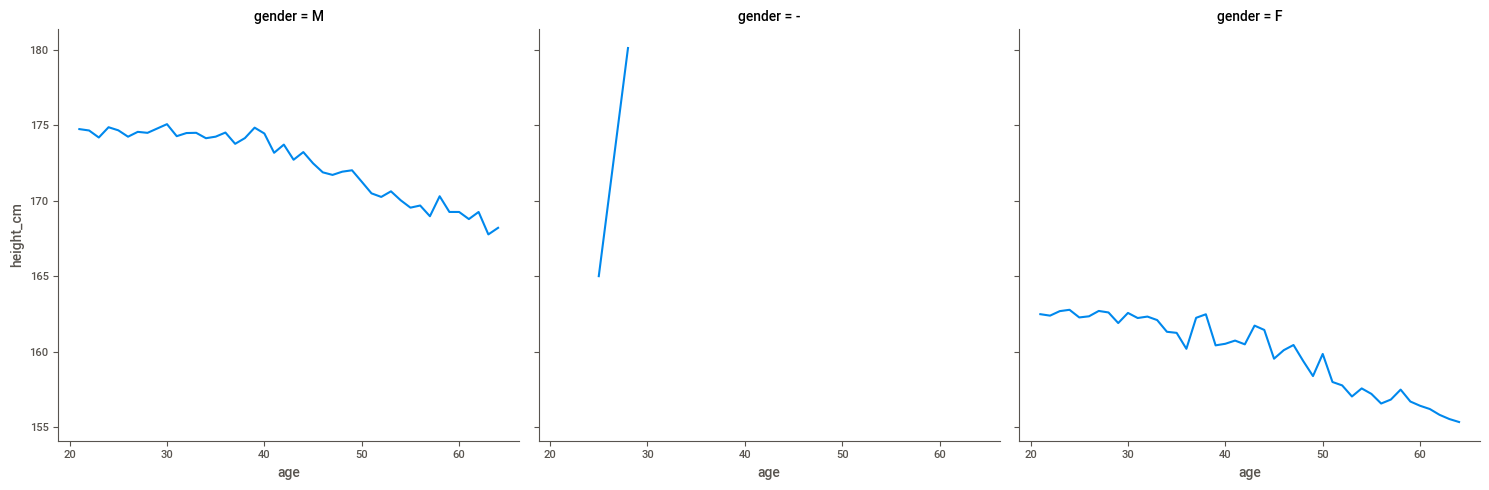

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


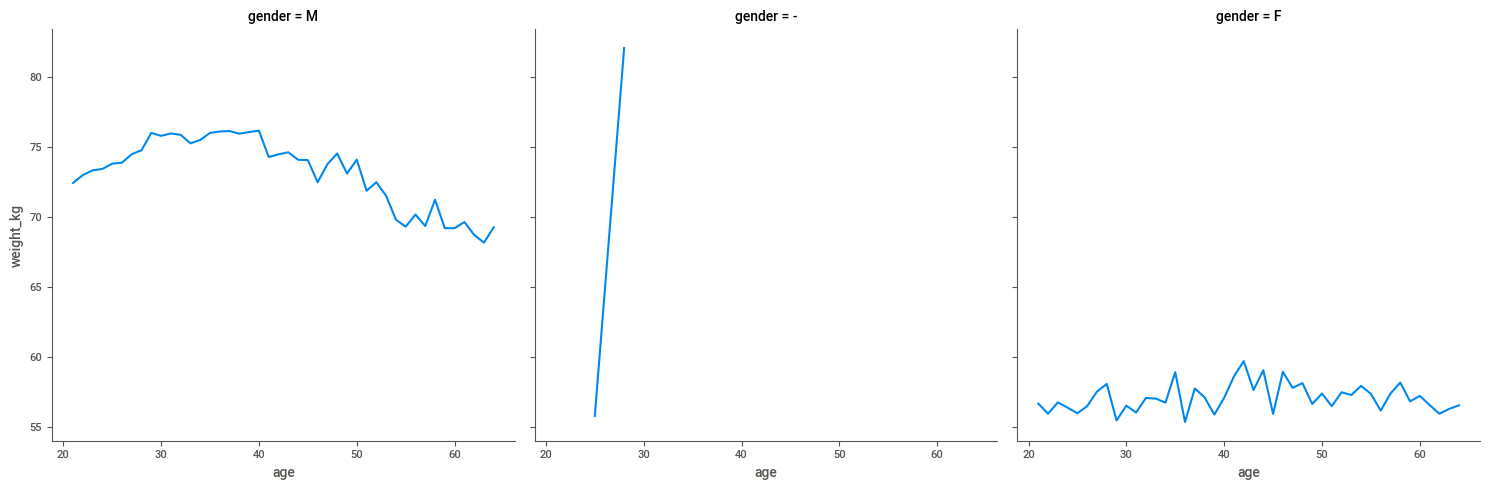

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


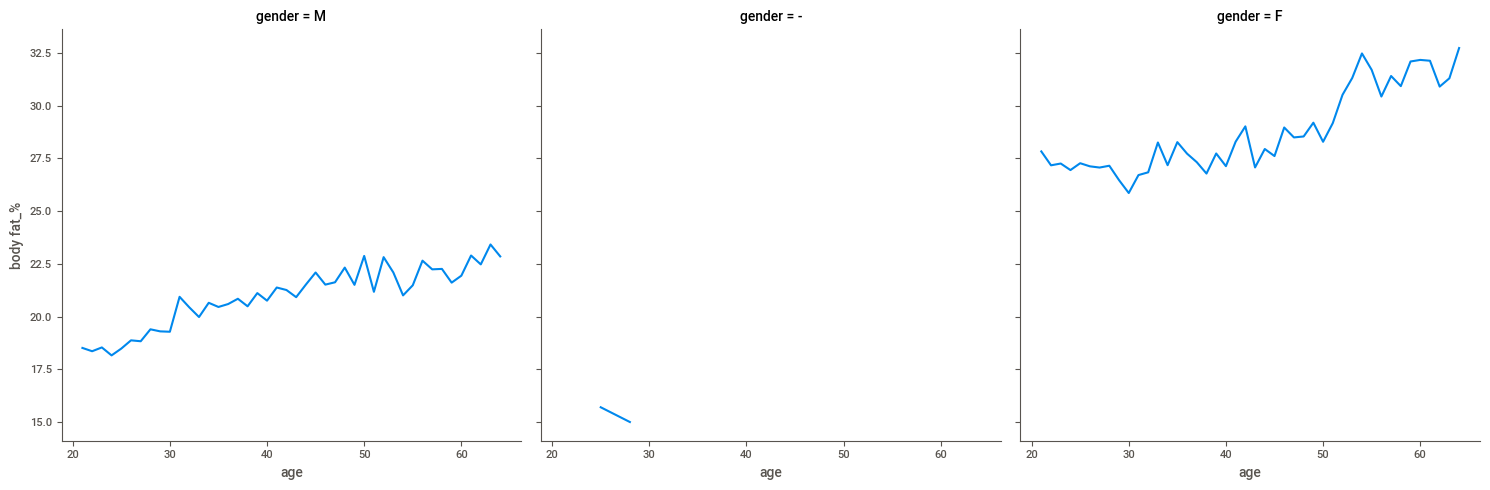

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


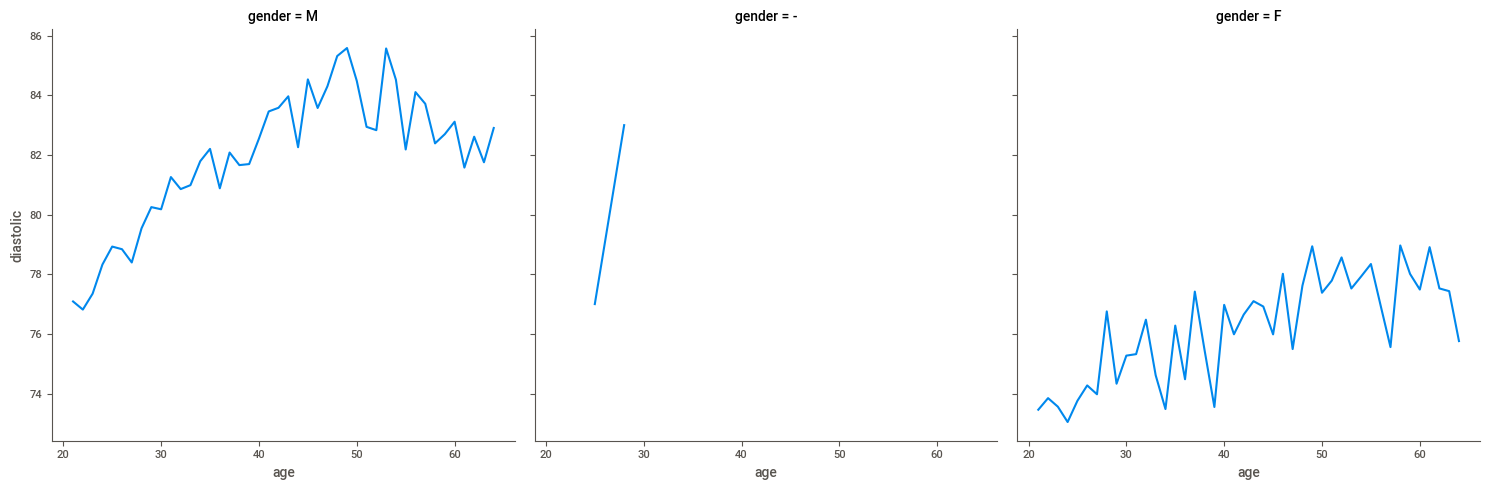

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


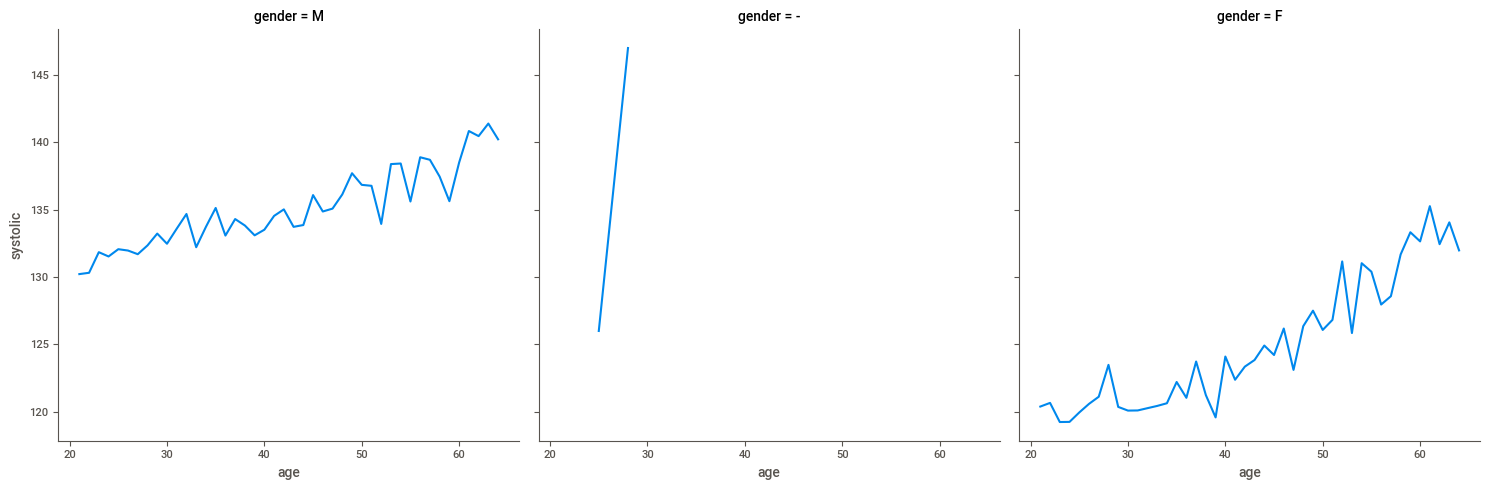

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


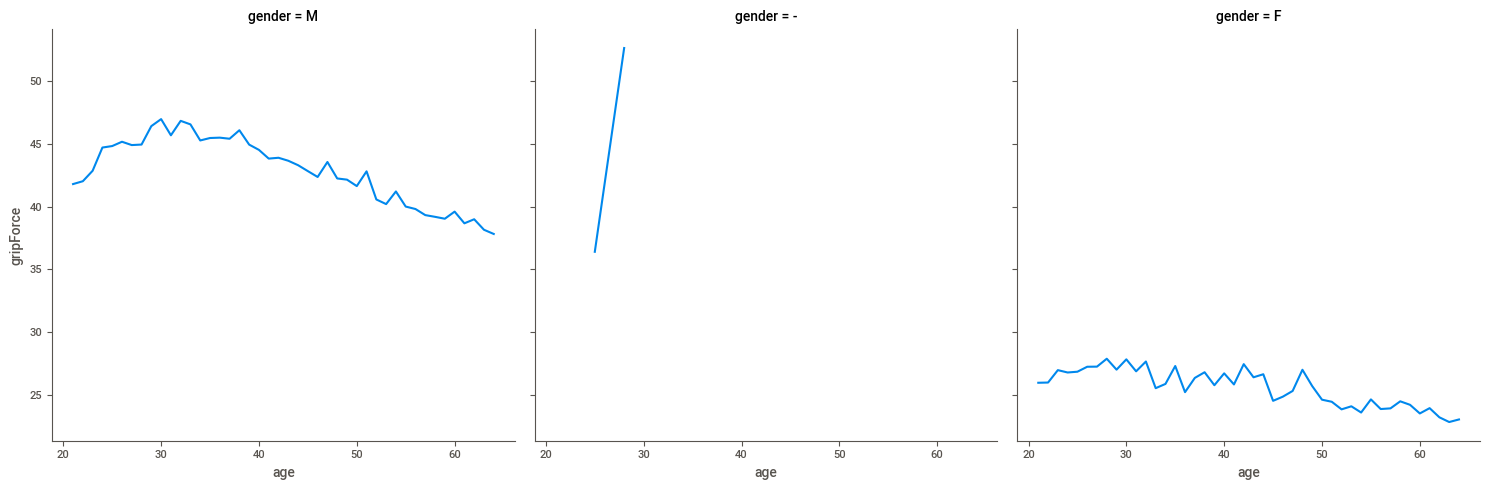

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


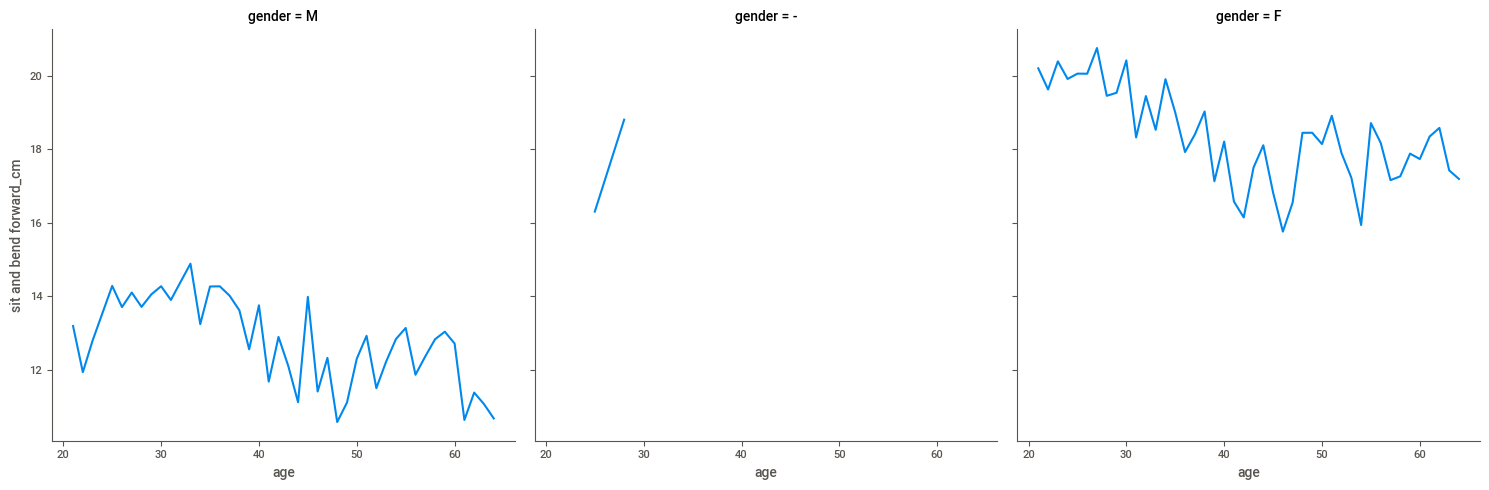

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


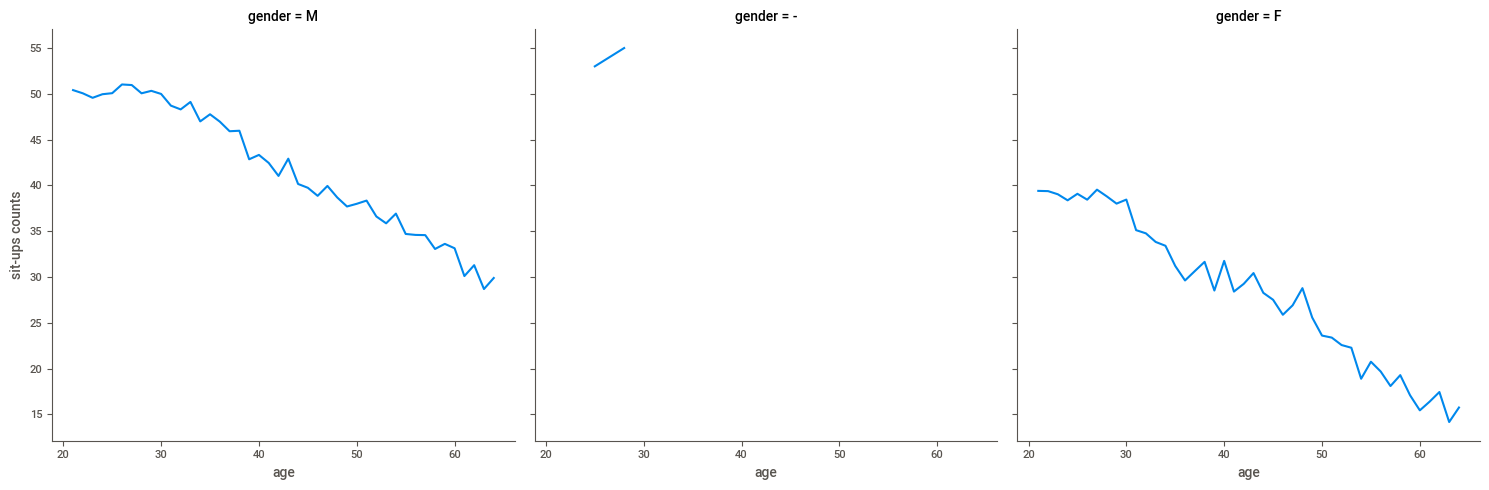

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


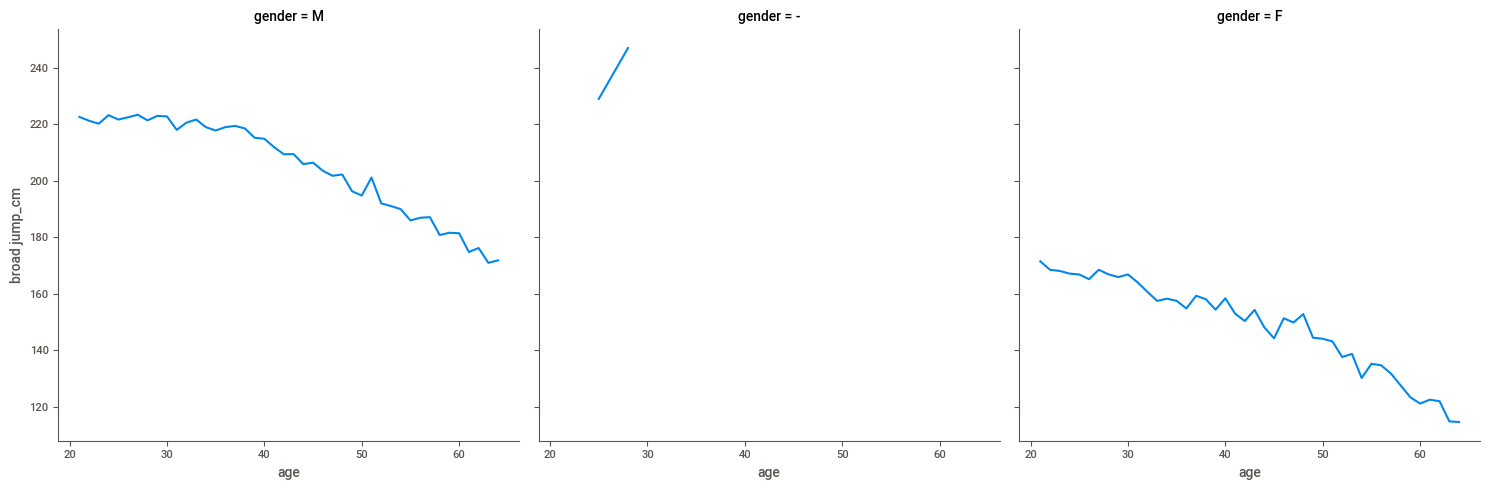

In [444]:
def relPlot(x,y):
    sns.relplot(
        x = x,
        y = y,
        data = df,
        col = "gender",
        kind = "line",
        ci = None,
        height = 5
    )
    plt.show()
    
for i in columns[1:]:
    relPlot("age",i)

### Выводы по полу
*   Мужчин в выборке 63.2 %
*   Женщин - 36.8%

### Выводы по возрасту: 
*   Самому молодому 21 год.
*   Средний возраст людей 36.8 лет.
*   Самому старшему человеку 64 года.

### Выводы по росту: 
*   Самый низкий человек с ростом 125 см.
*   Средний рост составляет 168.6 см.
*   Самый высокий человек с ростом 193.8 см

### Выводы по весу: 
*   Минимальный вес 26.3 кг
*   Средний вес 	67.4 кг
*   Максимальный вес 	138.1 кг

### Выводы по проценту жира: 
*   Минимальный показатель процента жира 3%. (маловероятно)
*   Средний показатель процента жира 23.2 %.
*   Максимальный показатель процента жира 78.4%

### Диастолическое артериальное давление
*   Минимальное давление - 0 (неверное значение) мм рт. ст.
*   Среднее давление - 	78.8 мм рт. ст.
*   Максимальное давление - 156.2 мм рт. ст.

### Систолическое артериальное давление
*   Минимальное давление - 0 (неверное значение) мм рт. ст.
*   Среднее давление - 130.2 (это норма) мм рт. ст.
*   Максимальное давление - 201 мм рт. ст.

### Сила сжатия кулака
*   Минимальная сила сжатия кулака - 0 (неверное значение)
*   Средняя сила сжатия кулака - 	36.9
*   Максимальная сила сжатия кулака - 70.5

### Наклон вперед из положения сидя, результат в сантиметрах (от пяток до кончиков пальцев)
*   Минимальное значение -25 см
*   Среднее значение -  15.2 см
*   Макcимальное значение -  213 см - ошибка

### Количество подъемов корпуса из положения лежа за 2 минуты
*   Минимальное значение 0
*   Среднее значение -	39.7 
*   Максимальное значение 80 (высокое значение) 

### Результат прыжка в длину
*   Минимальное значение 0 см - ошибка
*   Среднее значение -	190 см
*   Максимальное значение 303 см (высокое значение) 

## Общие выводы
1.   В то время как возраст увеличивается, рост уменьшается.
2.   Женщины ниже мужчин в среднем, они слабее в силе сжатия кулака и подъемов корпуса.
3. Люди становятся старше,и уровень жира в организме также растет у представителей обоих полов.
4.  Диастолическое и систолическое давление прямо пропорционально возрасту.
5.  Сила возрастает в среднем возрасте, но после этого она снижается.
6.  Женщины более гибкие исходя из графика по наклону в положении сидя.
7.  Возраст увеличивается и общий скачок также уменьшается для обоих полов.
8.  Возраст, влияет на количество подъемов и силу сжатия кулака.
9.  Рост, пропорционален весу, а также длине прыжка.
10. У женщин более высокое содержание жира в организме, нежели у мужчин.
11.  Показатели в подъемах корпуса, прыжках в длину и силе сжатия кулака имеют значение для определения класса.




In [445]:
mean_value = df.loc[df['diastolic'] != 0.0, 'diastolic'].mean()

In [446]:
df.loc[df['diastolic'] == 0.0, 'diastolic'] = mean_value

In [447]:
print(df)

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      -      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm cl

Избавляемся от невозможных показателей давления и сжатия кулака,заменяем средними значениями

In [448]:
mean_value = df.loc[df['systolic'] != 0.0, 'systolic'].mean()

In [449]:
df.loc[df['systolic'] == 0.0, 'systolic'] = mean_value

In [450]:
mean_value = df.loc[df['systolic'] != 0.0, 'systolic'].mean()

In [452]:
mean_value = df.loc[df['gripForce'] != 0.0, 'gripForce'].mean()

In [453]:
df.loc[df['gripForce'] == 0.0, 'gripForce'] = mean_value

In [454]:
filtered_df = df.loc[df['systolic'] == 0]

# выводим результаты
print(filtered_df)

Empty DataFrame
Columns: [age, gender, height_cm, weight_kg, body fat_%, diastolic, systolic, gripForce, sit and bend forward_cm, sit-ups counts, broad jump_cm, class]
Index: []


## 2. Устранение дубликатов


In [456]:
df = df.drop_duplicates()

У нас был один дубликат, от которого мы избавились.

#3. Устранение пропусков

In [457]:
df.isnull().values.any()

True

In [458]:
df = df.interpolate()

In [459]:
df.isnull().values.any()

False

In [460]:
df = df[~df["gender"].str.contains("-", regex=False)]

Удаляем значения с тире в столбце Пол. 

# 4. Работа с категориальными данными

In [461]:
data = df.copy()
data.loc[(data["systolic"] >= 120) & (data["systolic"] <= 130) , "systolic"] = 2 #normal
data.loc[(data["systolic"] < 120) , "systolic"] = 1 #low
data.loc[(data["systolic"] > 130) , "systolic"] = 3 #high


In [462]:

data.loc[(data["diastolic"] >= 70) & (data["diastolic"] <= 90) , "diastolic"] = 2 #normal
data.loc[(data["diastolic"] < 70) , "diastolic"] = 1 #low
data.loc[(data["diastolic"] > 90) , "diastolic"] = 3 #high


In [463]:
data["gender"] = data["gender"].replace({"M": 1, "F": 0}, regex=False).astype(float)

In [464]:
data.head(15)

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0   27.0     1.0      172.3      75.24        21.3        1.0       1.0   
2   31.0     1.0      179.6      78.00        20.1        3.0       3.0   
3   32.0     1.0      174.5      71.10        18.4        1.0       3.0   
4   28.0     1.0      173.8      67.70        17.1        1.0       1.0   
5   36.0     0.0      165.4      55.40        22.0        1.0       1.0   
6   42.0     0.0      164.5      63.70        32.2        1.0       3.0   
7   33.0     1.0      174.9      77.20        36.9        1.0       3.0   
8   54.0     1.0      166.8      67.50        27.6        1.0       3.0   
9   28.0     1.0      185.0      84.60        14.4        1.0       3.0   
10  42.0     1.0      169.2      65.40        19.3        1.0       1.0   
11  57.0     0.0      153.0      49.00        20.9        1.0       1.0   
12  27.0     0.0      156.0      53.90        35.5        1.0       1.0   
13  22.0     1.0      175.7      67.90        11.3        1.0       1.0   
14  24.0     1.0      181.0      84.40        20.4        1.0       1.0   
15  45.0     0.0      159.0      63.10        30.9        3.0       3.0   

    gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0        54.9                     18.4            60.0          217.0     C  
2        44.8                     12.0            49.0          181.0     C  
3        41.4                     15.2            53.0          219.0     B  
4        43.5                     27.1            45.0          217.0     B  
5        23.8                     21.0            27.0          153.0     B  
6        22.7                      0.8            18.0          146.0     D  
7        45.9                     12.3            42.0          234.0     B  
8        40.4                     18.6            34.0          148.0     C  
9        57.9                     12.1            55.0          213.0     B  
10       43.5                     16.0            68.0          211.0     A  
11       21.5                     30.0             0.0           90.0     D  
12       23.1                     13.1            28.0          144.0     C  
13       52.5                     19.2            55.0          232.0     C  
14       48.9                      7.2            54.0          213.0     C  
15       34.1                     19.0            30.0          155.0     A

In [465]:
data.dtypes

age                        float64
gender                     float64
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

#5. Выделение целевой переменной y и массива входных признаков X

Целевая переменная y - колонка class (df['class']), все остальное - входные признаки X

In [466]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# 6. Кросс-валидация, обучение модели

In [467]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
skf = StratifiedKFold(n_splits=5)
acc = []
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
  X_train = X[train_index]
  X_test = X[test_index]
  y_train = y[train_index]
  y_test = y[test_index]
  model = RandomForestClassifier()
  scaler = RobustScaler()
  model.fit(scaler.fit_transform(X_train), y_train)
  acc.append(accuracy_score(y_test, model.predict(scaler.transform(X_test))))
print("Accuracy: ", np.mean(acc) * 100, "%")

Accuracy:  73.73412994772218 %


In [468]:
model = RandomForestClassifier()
scaler = RobustScaler()
model.fit(scaler.fit_transform(X), y)

RandomForestClassifier()

# 7. Веб-приложение Gradio

In [375]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [392]:
import gradio as gr
import pandas as pd

inputs = [gr.Dataframe(row_count = (15, "dynamic"), col_count=(15,"dynamic"), label="Input Data", interactive=1)]

outputs = [gr.Dataframe(row_count = (15, "dynamic"), col_count=(1, "fixed"), label="Predictions", headers=["Physical Condition"])]

def infer(input_dataframe):
  scaled = scaler.transform(input_dataframe)
  return pd.DataFrame(model.predict(scaled))

gr.Interface(fn=infer, inputs=inputs, outputs=outputs, examples=[[X[:15, :]]]).launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>